# Importing the packages

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from scipy.stats import zscore
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Collecting the sales data

In [5]:

sales=pd.read_csv("C://Users//pawar//Videos//Deep_Practice//SALES_PREDICTI//Sales_2021.csv")
sales

,Sales,Advt,PC
0,42.02,4.30,2.74
1,40.35,2.70,3.27
2,46.89,4.59,3.30
3,54.10,4.54,3.41
4,70.13,8.87,3.85
...,...,...,...
66,121.83,11.03,7.11
67,108.58,5.67,7.19
68,121.60,9.58,9.19
69,119.49,10.37,8.04


In [6]:
sales.shape

(71, 3)

In [7]:
sales.tail(20)

,Sales,Advt,PC
51,119.49,10.37,8.04
52,144.17,17.33,9.85
53,128.90,4.10,9.58
54,42.02,4.30,2.74
55,40.35,2.70,3.27
56,46.89,4.59,3.30
57,54.10,4.54,3.41
58,70.13,8.87,3.85
59,63.37,3.17,4.10
60,74.01,7.44,4.14


In [8]:
sales.duplicated().any()

True

In [9]:
sales.columns

Index(['Sales', 'Advt', 'PC'], dtype='object')

In [10]:
type(sales)

pandas.core.frame.DataFrame

In [11]:
sales.describe()

,Sales,Advt,PC
count,71.000000,71.000000,71.000000
mean,90.198592,7.686479,5.839155
std,31.850540,3.654461,2.258099
min,40.350000,2.700000,2.740000
25%,63.370000,4.540000,3.850000
50%,90.630000,8.330000,5.220000
75%,120.290000,10.180000,7.500000
max,144.170000,17.330000,9.850000


# I Model_1 Sales with Advt

we are building the model only on advt as per client requirment future 4Q sales predictions 
budget allocating
2020 june 17L 
2020 sep 11L
2020 dec 9L
2021 march 16L

# 1.1 Model_1(direct)

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols('Sales~Advt',data=sales).fit()
model1=sm.stats.anova_lm(model)
model1
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     85.20
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           1.14e-13
Time:                        20:26:54   Log-Likelihood:                -317.43
No. Observations:                  71   AIC:                             638.9
Df Residuals:                      69   BIC:                             643.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4016      5.966      6.772      0.0

In [14]:
pre1=model.predict()
pre1

array([ 68.25924608,  57.89362619,  70.13801468,  69.81408906,
        97.86604788,  60.93852703,  88.60177511,  94.36765117,
        98.7082545 ,  73.31248577, 112.83141159, 106.35289916,
       111.85963473,  77.13480811, 102.4657917 , 107.58381652,
       152.67426303,  66.96354359,  68.25924608,  57.89362619,
        70.13801468,  69.81408906,  97.86604788,  60.93852703,
        88.60177511,  94.36765117,  98.7082545 ,  73.31248577,
       112.83141159, 106.35289916, 111.85963473,  77.13480811,
       102.4657917 , 107.58381652, 152.67426303,  66.96354359,
        68.25924608,  57.89362619,  70.13801468,  69.81408906,
        97.86604788,  60.93852703,  88.60177511,  94.36765117,
        98.7082545 ,  73.31248577, 112.83141159, 106.35289916,
       111.85963473,  77.13480811, 102.4657917 , 107.58381652,
       152.67426303,  66.96354359,  68.25924608,  57.89362619,
        70.13801468,  69.81408906,  97.86604788,  60.93852703,
        88.60177511,  94.36765117,  98.7082545 ,  73.31

In [15]:
res1=sales['Sales'].values-pre1
res1

array([-26.23924608, -17.54362619, -23.24801468, -15.71408906,
       -27.73604788,   2.43147297, -14.59177511,  -7.73765117,
        -3.5382545 ,  17.31751423,  -7.74141159,  13.93710084,
         9.97036527,  31.44519189,  19.1342083 ,  11.90618348,
        -8.50426303,  61.93645641, -26.23924608, -17.54362619,
       -23.24801468, -15.71408906, -27.73604788,   2.43147297,
       -14.59177511,  -7.73765117,  -3.5382545 ,  17.31751423,
        -7.74141159,  13.93710084,   9.97036527,  31.44519189,
        19.1342083 ,  11.90618348,  -8.50426303,  61.93645641,
       -26.23924608, -17.54362619, -23.24801468, -15.71408906,
       -27.73604788,   2.43147297, -14.59177511,  -7.73765117,
        -3.5382545 ,  17.31751423,  -7.74141159,  13.93710084,
         9.97036527,  31.44519189,  19.1342083 ,  11.90618348,
        -8.50426303,  61.93645641, -26.23924608, -17.54362619,
       -23.24801468, -15.71408906, -27.73604788,   2.43147297,
       -14.59177511,  -7.73765117,  -3.5382545 ,  17.31

In [22]:
pre_1=pd.DataFrame(pre1,columns=["pre1"])
pre_1

,pre1
0,68.259246
1,57.893626
2,70.138015
3,69.814089
4,97.866048
...,...
66,111.859635
67,77.134808
68,102.465792
69,107.583817


In [17]:
res_1=pd.DataFrame(res1,columns=["res1"])
res_1

,res1
0,-26.239246
1,-17.543626
2,-23.248015
3,-15.714089
4,-27.736048
...,...
66,9.970365
67,31.445192
68,19.134208
69,11.906183


In [23]:
zscore1=pd.DataFrame(zscore(res1),columns=['zscore1'])
zscore1

,zscore1
0,-1.240331
1,-0.829288
2,-1.098935
3,-0.742806
4,-1.311085
...,...
66,0.471300
67,1.486416
68,0.904475
69,0.562806


In [25]:
sales1=pd.concat([sales,pre_1,res_1,zscore1],axis=1)
sales1
sales_1=pd.DataFrame(sales1)
sales_1

,Sales,Advt,PC,pre1,res1,zscore1
0,42.02,4.30,2.74,68.259246,-26.239246,-1.240331
1,40.35,2.70,3.27,57.893626,-17.543626,-0.829288
2,46.89,4.59,3.30,70.138015,-23.248015,-1.098935
3,54.10,4.54,3.41,69.814089,-15.714089,-0.742806
4,70.13,8.87,3.85,97.866048,-27.736048,-1.311085
...,...,...,...,...,...,...
66,121.83,11.03,7.11,111.859635,9.970365,0.471300
67,108.58,5.67,7.19,77.134808,31.445192,1.486416
68,121.60,9.58,9.19,102.465792,19.134208,0.904475
69,119.49,10.37,8.04,107.583817,11.906183,0.562806


In [26]:
zscore1[zscore1['zscore1']>1.96]

,zscore1
17,2.92774
35,2.92774
53,2.92774


In [27]:
zscore1[zscore1['zscore1']<-1.96]

,zscore1


# 1.2 Model_1 Applying (Dummy)

We are applying dummy,where the value is above 1.96 as 1 and below 1.96 as 0 because those are the outliers to improve the model dummy variable is used.

In [28]:
a=sales_1.copy()
for i in range(0,len(a)):
    if(np.any(a['zscore1'].values[i]>1.96)):
        a['zscore1'].values[i]=0
    else:
        a['zscore1'].values[i]=1
        test=a['zscore1']
        test
sales_1['dummy']=test
sales_1

,Sales,Advt,PC,pre1,res1,zscore1,dummy
0,42.02,4.30,2.74,68.259246,-26.239246,-1.240331,1.0
1,40.35,2.70,3.27,57.893626,-17.543626,-0.829288,1.0
2,46.89,4.59,3.30,70.138015,-23.248015,-1.098935,1.0
3,54.10,4.54,3.41,69.814089,-15.714089,-0.742806,1.0
4,70.13,8.87,3.85,97.866048,-27.736048,-1.311085,1.0
...,...,...,...,...,...,...,...
66,121.83,11.03,7.11,111.859635,9.970365,0.471300,1.0
67,108.58,5.67,7.19,77.134808,31.445192,1.486416,1.0
68,121.60,9.58,9.19,102.465792,19.134208,0.904475,1.0
69,119.49,10.37,8.04,107.583817,11.906183,0.562806,1.0


In [29]:
x=sales_1[["Advt","dummy"]]
y=sales_1["Sales"]
y

0      42.02
1      40.35
2      46.89
3      54.10
4      70.13
       ...  
66    121.83
67    108.58
68    121.60
69    119.49
70    144.17
Name: Sales, Length: 71, dtype: float64

Text(0, 0.5, 'Sales')

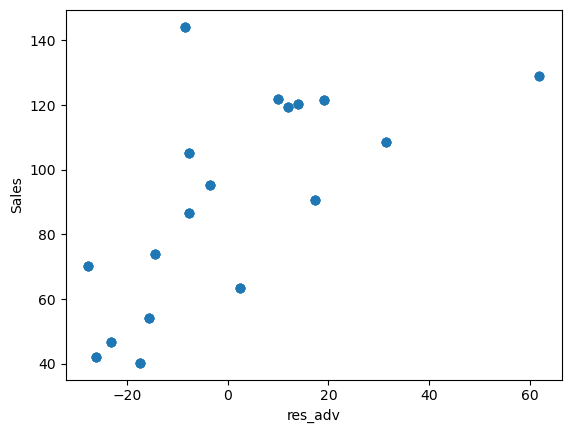

In [31]:
plt.scatter(res1,y)
plt.xlabel("res_adv")
plt.ylabel("Sales")

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=0)

In [57]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [54]:
y_train

55     40.35
69    119.49
62     95.17
43     86.63
4      70.13
65    120.29
50    121.60
2      46.89
40     70.13
11    120.29
3      54.10
54     42.02
45     90.63
10    105.09
41     63.37
49    108.58
53    128.90
57     54.10
32    121.60
14    121.60
68    121.60
19     40.35
29    120.29
52    144.17
35    128.90
18     42.02
0      42.02
15    119.49
5      63.37
16    144.17
20     46.89
66    121.83
8      95.17
13    108.58
25     86.63
37     40.35
17    128.90
60     74.01
46    105.09
63     90.63
39     54.10
38     46.89
1      40.35
58     70.13
12    121.83
61     86.63
24     74.01
6      74.01
23     63.37
36     42.02
21     54.10
9      90.63
67    108.58
64    105.09
47    120.29
44     95.17
Name: Sales, dtype: float64

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x_train1=sm.add_constant(x_train)
x_train1



model=sm.OLS( y_train,x_train1).fit()
print(model.summary())
ols = linear_model.LinearRegression()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     73.60
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           5.07e-16
Time:                        21:55:42   Log-Likelihood:                -236.24
No. Observations:                  56   AIC:                             478.5
Df Residuals:                      53   BIC:                             484.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.2296     10.149      9.580      0.0

In [25]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 121.86440288437538
Coefficients: 
 [  8.32819565 -85.21738626]


In [60]:
y_pred = regr.predict(x_test)
d = pd.DataFrame(y_pred)
d


,0
0,97.310957
1,67.030956
2,112.991672
3,96.306774
4,112.991672
5,107.893509
6,92.135549
7,52.277180
8,161.655959
9,161.655959


In [59]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 25.40130712339054
Mean Squared Error: 930.6445619274439
Root Mean Squared Error: 30.506467542595683


# 1.3 Model_1 Applying(Square)

In [61]:
sales_1["sqr_Advt"]=sales_1["Advt"]**2
sales_1

,Sales,Advt,PC,pre1,res1,zscore1,dummy,sqr_Advt
0,42.02,4.30,2.74,68.259246,-26.239246,-1.240331,1.0,18.4900
1,40.35,2.70,3.27,57.893626,-17.543626,-0.829288,1.0,7.2900
2,46.89,4.59,3.30,70.138015,-23.248015,-1.098935,1.0,21.0681
3,54.10,4.54,3.41,69.814089,-15.714089,-0.742806,1.0,20.6116
4,70.13,8.87,3.85,97.866048,-27.736048,-1.311085,1.0,78.6769
...,...,...,...,...,...,...,...,...
66,121.83,11.03,7.11,111.859635,9.970365,0.471300,1.0,121.6609
67,108.58,5.67,7.19,77.134808,31.445192,1.486416,1.0,32.1489
68,121.60,9.58,9.19,102.465792,19.134208,0.904475,1.0,91.7764
69,119.49,10.37,8.04,107.583817,11.906183,0.562806,1.0,107.5369


In [63]:
x=sales_1[["Advt","sqr_Advt"]]
y=sales_1["Sales"]
y

0      42.02
1      40.35
2      46.89
3      54.10
4      70.13
       ...  
66    121.83
67    108.58
68    121.60
69    119.49
70    144.17
Name: Sales, Length: 71, dtype: float64

Text(0, 0.5, 'Sales')

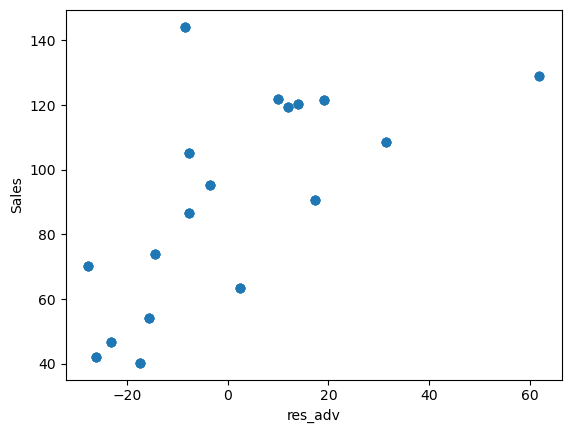

In [41]:
plt.scatter(res1,y)
plt.xlabel("res_adv")
plt.ylabel("Sales")

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=0)

In [43]:
x_train

,Advt,dummy
55,2.70,1.0
69,10.37,1.0
62,9.00,1.0
43,8.33,1.0
4,8.87,1.0
65,10.18,1.0
50,9.58,1.0
2,4.59,1.0
40,8.87,1.0
11,10.18,1.0


In [44]:
y_train

55     40.35
69    119.49
62     95.17
43     86.63
4      70.13
65    120.29
50    121.60
2      46.89
40     70.13
11    120.29
3      54.10
54     42.02
45     90.63
10    105.09
41     63.37
49    108.58
53    128.90
57     54.10
32    121.60
14    121.60
68    121.60
19     40.35
29    120.29
52    144.17
35    128.90
18     42.02
0      42.02
15    119.49
5      63.37
16    144.17
20     46.89
66    121.83
8      95.17
13    108.58
25     86.63
37     40.35
17    128.90
60     74.01
46    105.09
63     90.63
39     54.10
38     46.89
1      40.35
58     70.13
12    121.83
61     86.63
24     74.01
6      74.01
23     63.37
36     42.02
21     54.10
9      90.63
67    108.58
64    105.09
47    120.29
44     95.17
Name: Sales, dtype: float64

In [45]:
x_test

,Advt,dummy
26,9.00,1.0
27,5.08,1.0
48,11.03,1.0
22,8.87,1.0
30,11.03,1.0
51,10.37,1.0
7,8.33,1.0
59,3.17,1.0
34,17.33,1.0
70,17.33,1.0


In [46]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x_train1=sm.add_constant(x_train)
model=sm.OLS( y_train,x_train1).fit()
print(model.summary())
# ols = linear_model.LinearRegression()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     73.60
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           5.07e-16
Time:                        21:48:38   Log-Likelihood:                -236.24
No. Observations:                  56   AIC:                             478.5
Df Residuals:                      53   BIC:                             484.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.2296     10.149      9.580      0.0

In [64]:
# regr = linear_model.LinearRegression()
# regr.fit(x_train,y_train)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

Intercept: 
 97.22959086026619
Coefficients: 
 [  7.72449003 -69.43904391]


In [68]:
y_pred = regr.predict(x_test)
z = pd.DataFrame(y_pred)
z

,0
0,97.310957
1,67.030956
2,112.991672
3,96.306774
4,112.991672
5,107.893509
6,92.135549
7,52.277180
8,161.655959
9,161.655959


In [69]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 26.134786342713575
Mean Squared Error: 921.3613221753258
Root Mean Squared Error: 30.35393421247608


# 1.4 Model_1 Applying(Square root)

In [70]:
sales_1["squareRoot_Advt"]=sales1["Advt"]**(1/2)
sales_1

,Sales,Advt,PC,pre1,res1,zscore1,dummy,sqr_Advt,squareRoot_Advt
0,42.02,4.30,2.74,68.259246,-26.239246,-1.240331,1.0,18.4900,2.073644
1,40.35,2.70,3.27,57.893626,-17.543626,-0.829288,1.0,7.2900,1.643168
2,46.89,4.59,3.30,70.138015,-23.248015,-1.098935,1.0,21.0681,2.142429
3,54.10,4.54,3.41,69.814089,-15.714089,-0.742806,1.0,20.6116,2.130728
4,70.13,8.87,3.85,97.866048,-27.736048,-1.311085,1.0,78.6769,2.978255
...,...,...,...,...,...,...,...,...,...
66,121.83,11.03,7.11,111.859635,9.970365,0.471300,1.0,121.6609,3.321144
67,108.58,5.67,7.19,77.134808,31.445192,1.486416,1.0,32.1489,2.381176
68,121.60,9.58,9.19,102.465792,19.134208,0.904475,1.0,91.7764,3.095158
69,119.49,10.37,8.04,107.583817,11.906183,0.562806,1.0,107.5369,3.220248


In [71]:
x_ADVT=sales_1[["Advt","squareRoot_Advt"]]
y_ADVT=sales_1["Sales"]
y_ADVT

0      42.02
1      40.35
2      46.89
3      54.10
4      70.13
       ...  
66    121.83
67    108.58
68    121.60
69    119.49
70    144.17
Name: Sales, Length: 71, dtype: float64

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_ADVT, y_ADVT, test_size=0.20,random_state=0)

In [73]:
x_train

,Advt,squareRoot_Advt
55,2.70,1.643168
69,10.37,3.220248
62,9.00,3.000000
43,8.33,2.886174
4,8.87,2.978255
65,10.18,3.190611
50,9.58,3.095158
2,4.59,2.142429
40,8.87,2.978255
11,10.18,3.190611


In [44]:
y_train

33     173.26
101    213.11
146     40.35
197    219.08
134     45.58
201    154.74
186     99.26
215     84.02
16     111.47
92     178.53
107     76.09
130    109.54
22      70.33
200    182.06
45     168.04
208    140.66
4      217.16
137    118.34
154     43.25
61     118.34
52      66.58
26     173.01
136    133.16
40      77.37
13      58.91
159    106.55
182    219.59
24     134.38
30     182.34
60     105.09
        ...  
79      86.63
115    122.12
148    190.34
213    244.13
72      96.17
77     142.94
25     219.08
165    222.31
81     179.16
207    220.36
174     96.21
209    220.36
39     149.54
193    108.58
58     152.18
140    142.33
88      91.03
70     138.67
87     121.91
36     158.38
21     136.62
211     30.48
9      163.78
103    198.48
195    209.12
67      86.51
192    157.03
117    133.55
47     194.81
172     54.63
Name: Sales, Length: 176, dtype: float64

In [74]:
x_test

,Advt,squareRoot_Advt
26,9.00,3.000000
27,5.08,2.253886
48,11.03,3.321144
22,8.87,2.978255
30,11.03,3.321144
51,10.37,3.220248
7,8.33,2.886174
59,3.17,1.780449
34,17.33,4.162932
70,17.33,4.162932


In [83]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [84]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x_train1=sm.add_constant(x_train)
model=sm.OLS( y_train,x_train1).fit()
print(model.summary())
ols = linear_model.LinearRegression()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     28.19
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           4.60e-09
Time:                        23:10:28   Log-Likelihood:                -253.17
No. Observations:                  56   AIC:                             512.3
Df Residuals:                      53   BIC:                             518.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.0402     49.304     

In [82]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -7.04015540076503
Coefficients: 
 [ 0.28479914 35.3012399 ]


In [85]:
y_pred = regr.predict(x_test)
dj = pd.DataFrame(y_pred)
dj

,0
0,101.426757
1,73.971578
2,113.341694
3,100.622090
4,113.341694
5,109.591974
6,97.217740
7,56.714729
8,144.852063
9,144.852063


In [86]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12.545867214367977
Mean Squared Error: 236.9227710770383
Root Mean Squared Error: 15.392295835158519


# 1.5 Model_1 Applying(log10)

In [90]:
sales_1['log_Advt'] = np.log10(sales_1['Advt'])
sales_1   

,Sales,Advt,PC,pre1,res1,zscore1,dummy,sqr_Advt,squareRoot_Advt,log_Advt
0,42.02,4.30,2.74,68.259246,-26.239246,-1.240331,1.0,18.4900,2.073644,0.633468
1,40.35,2.70,3.27,57.893626,-17.543626,-0.829288,1.0,7.2900,1.643168,0.431364
2,46.89,4.59,3.30,70.138015,-23.248015,-1.098935,1.0,21.0681,2.142429,0.661813
3,54.10,4.54,3.41,69.814089,-15.714089,-0.742806,1.0,20.6116,2.130728,0.657056
4,70.13,8.87,3.85,97.866048,-27.736048,-1.311085,1.0,78.6769,2.978255,0.947924
...,...,...,...,...,...,...,...,...,...,...
66,121.83,11.03,7.11,111.859635,9.970365,0.471300,1.0,121.6609,3.321144,1.042576
67,108.58,5.67,7.19,77.134808,31.445192,1.486416,1.0,32.1489,2.381176,0.753583
68,121.60,9.58,9.19,102.465792,19.134208,0.904475,1.0,91.7764,3.095158,0.981366
69,119.49,10.37,8.04,107.583817,11.906183,0.562806,1.0,107.5369,3.220248,1.015779


In [91]:
x_advt=sales_1[["Advt","log_Advt"]]
y_advt=sales_1["Sales"]
y_advt

0      42.02
1      40.35
2      46.89
3      54.10
4      70.13
       ...  
66    121.83
67    108.58
68    121.60
69    119.49
70    144.17
Name: Sales, Length: 71, dtype: float64

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_advt, y_advt, test_size=0.20,random_state=0)

In [94]:
x_train

,Advt,log_Advt
55,2.70,0.431364
69,10.37,1.015779
62,9.00,0.954243
43,8.33,0.920645
4,8.87,0.947924
65,10.18,1.007748
50,9.58,0.981366
2,4.59,0.661813
40,8.87,0.947924
11,10.18,1.007748


In [95]:
y_train

55     40.35
69    119.49
62     95.17
43     86.63
4      70.13
65    120.29
50    121.60
2      46.89
40     70.13
11    120.29
3      54.10
54     42.02
45     90.63
10    105.09
41     63.37
49    108.58
53    128.90
57     54.10
32    121.60
14    121.60
68    121.60
19     40.35
29    120.29
52    144.17
35    128.90
18     42.02
0      42.02
15    119.49
5      63.37
16    144.17
20     46.89
66    121.83
8      95.17
13    108.58
25     86.63
37     40.35
17    128.90
60     74.01
46    105.09
63     90.63
39     54.10
38     46.89
1      40.35
58     70.13
12    121.83
61     86.63
24     74.01
6      74.01
23     63.37
36     42.02
21     54.10
9      90.63
67    108.58
64    105.09
47    120.29
44     95.17
Name: Sales, dtype: float64

In [96]:
x_test

,Advt,log_Advt
26,9.00,0.954243
27,5.08,0.705864
48,11.03,1.042576
22,8.87,0.947924
30,11.03,1.042576
51,10.37,1.015779
7,8.33,0.920645
59,3.17,0.501059
34,17.33,1.238799
70,17.33,1.238799


In [97]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [98]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x_train1=sm.add_constant(x_train)
model=sm.OLS( y_train,x_train1).fit()
print(model.summary())
ols = linear_model.LinearRegression()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     28.29
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           4.36e-09
Time:                        23:14:38   Log-Likelihood:                -253.11
No. Observations:                  56   AIC:                             512.2
Df Residuals:                      53   BIC:                             518.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2002     22.887      0.752      0.4

In [100]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 17.200157348173718
Coefficients: 
 [ 3.26015353 57.50697501]


In [102]:
y_pred = regr.predict(x_test)
dj2 = pd.DataFrame(y_pred)
dj2

,0
0,101.417139
1,74.353824
2,113.115015
3,100.629939
4,113.115015
5,109.422313
6,97.300745
7,56.349247
8,144.938176
9,144.938176


In [103]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# II Model_2 Sales with PC


we are building the model only on PC as per client requirment future 4Q sales predictions budget allocating 2020 june 17L 2020 sep 11L 2020 dec 9L 2021 march 16L

# 2.1 Model_2(direct)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols('Sales~PC',data=sales).fit()
model2=sm.stats.anova_lm(model)
model2
print(model.summary())

In [ ]:
pre2=model.predict()
pre2

In [ ]:
pre_2=pd.DataFrame(pre2,columns=['pre2'])
pre_2

In [ ]:
res2=sales['Sales'].values-pre2
res2

In [ ]:
res_2=pd.DataFrame(res2,columns=['res2'])
res_2

In [ ]:
zscore2=pd.DataFrame(zscore(res2),columns=['zscore2'])
zscore2

In [ ]:
sales2=pd.concat([sales,pre_2,res_2,zscore2],axis=1)
sales2
sales_2=pd.DataFrame(sales2)
sales_2

In [ ]:
zscore2[zscore2['zscore2']>1.96]

In [ ]:
zscore2[zscore2['zscore2']<-1.96]

In [ ]:
b=sales_2.copy()
for i in range(0,len(b)):
    if(np.any(b['zscore2'].values[i]>1.96)):
        b['zscore2'].values[i]=0
    else:
        b['zscore2'].values[i]=1         
        test=b['zscore2']
        test
sales_2['dummy']=test
sales_2

# 2.2 Model_2 Applying(Square)

In [ ]:
sales_2["sqr_PC"]=sales_2["PC"]**2
sales_2

In [ ]:
x_PC=sales_2[["PC","sqr_PC"]]
y_PC=sales_2["Sales"]
x_PC

In [ ]:
plt.scatter(y_PC,res2)
plt.xlabel("res_pc")
plt.ylabel("Sales")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_PC, y_PC, test_size=0.20,random_state=0)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x_train1=sm.add_constant(x_train)
model=sm.OLS( y_train,x_train1).fit()
print(model.summary())
ols = linear_model.LinearRegression()

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

In [ ]:
y_pred = regr.predict(x_test)
y_pred

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# 2.4 Model_2 Applying(SquareRoot)

In [ ]:
sales_2["squareRoot_PC"]=sales_2["PC"]**(1/2)
sales_2

In [ ]:
x_PC=sales_2[["PC","squareRoot_PC"]]
y_PC=sales_2["Sales"]
y_PC

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_PC, y_PC, test_size=0.20,random_state=0)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x_train1=sm.add_constant(x_train)
model=sm.OLS( y_train,x_train1).fit()
print(model.summary())
ols = linear_model.LinearRegression()

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

In [ ]:
y_pred = regr.predict(x_test)
y_pred

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# 2.5 Model_2 Applying(Log10)

In [ ]:
sales_2['log_PC'] = np.log10(sales_2['PC'])
(sales_2)          

In [ ]:
x_pc=sales_2[["PC","log_PC"]]
y_pc=sales_2["Sales"]
y_pc

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pc, y_pc, test_size=0.20,random_state=0)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x_train1=sm.add_constant(x_train)
model=sm.OLS( y_train,x_train1).fit()
print(model.summary())
ols = linear_model.LinearRegression()

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

y_pred = regr.predict(x_test)
y_pred

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# III Model_3 Sales with Advt and PC 

we are building the model only on Advt and PC as per client requirment future 4Q sales predictions budget allocating 2020 june 17L 2020 sep 11L 2020 dec 9L 2021 march 16L

# 3.1 Model_3(direct)

In [105]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols('Sales~Advt+PC',data=sales).fit()
model3=sm.stats.anova_lm(model)
model3
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     708.0
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           3.00e-46
Time:                        23:20:57   Log-Likelihood:                -236.53
No. Observations:                  71   AIC:                             479.1
Df Residuals:                      68   BIC:                             485.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7979      2.341      3.331      0.0

In [109]:
pre3=model.predict()
pre3

array([ 47.78066723,  50.89560326,  54.83388595,  56.01616743,
        69.3497547 ,  61.42579778,  70.00086065,  80.39990819,
        85.50429309,  87.34760593, 106.1332524 , 114.21961257,
       111.30569215, 102.05360752, 132.70320647, 120.85065942,
       155.08738408, 126.82272157,  47.78066723,  50.89560326,
        54.83388595,  56.01616743,  69.3497547 ,  61.42579778,
        70.00086065,  80.39990819,  85.50429309,  87.34760593,
       106.1332524 , 114.21961257, 111.30569215, 102.05360752,
       132.70320647, 120.85065942, 155.08738408, 126.82272157,
        47.78066723,  50.89560326,  54.83388595,  56.01616743,
        69.3497547 ,  61.42579778,  70.00086065,  80.39990819,
        85.50429309,  87.34760593, 106.1332524 , 114.21961257,
       111.30569215, 102.05360752, 132.70320647, 120.85065942,
       155.08738408, 126.82272157,  47.78066723,  50.89560326,
        54.83388595,  56.01616743,  69.3497547 ,  61.42579778,
        70.00086065,  80.39990819,  85.50429309,  87.34

In [111]:
pre_3=pd.DataFrame(pre3,columns=['pre3'])
pre_3


,pre3
0,47.780667
1,50.895603
2,54.833886
3,56.016167
4,69.349755
...,...
66,111.305692
67,102.053608
68,132.703206
69,120.850659


In [114]:
res3=sales['Sales'].values-pre3
res3

array([ -5.76066723, -10.54560326,  -7.94388595,  -1.91616743,
         0.7802453 ,   1.94420222,   4.00913935,   6.23009181,
         9.66570691,   3.28239407,  -1.0432524 ,   6.07038743,
        10.52430785,   6.52639248, -11.10320647,  -1.36065942,
       -10.91738408,   2.07727843,  -5.76066723, -10.54560326,
        -7.94388595,  -1.91616743,   0.7802453 ,   1.94420222,
         4.00913935,   6.23009181,   9.66570691,   3.28239407,
        -1.0432524 ,   6.07038743,  10.52430785,   6.52639248,
       -11.10320647,  -1.36065942, -10.91738408,   2.07727843,
        -5.76066723, -10.54560326,  -7.94388595,  -1.91616743,
         0.7802453 ,   1.94420222,   4.00913935,   6.23009181,
         9.66570691,   3.28239407,  -1.0432524 ,   6.07038743,
        10.52430785,   6.52639248, -11.10320647,  -1.36065942,
       -10.91738408,   2.07727843,  -5.76066723, -10.54560326,
        -7.94388595,  -1.91616743,   0.7802453 ,   1.94420222,
         4.00913935,   6.23009181,   9.66570691,   3.28

In [115]:
res_3=pd.DataFrame(res3,columns=['res3'])
res_3

,res3
0,-5.760667
1,-10.545603
2,-7.943886
3,-1.916167
4,0.780245
...,...
66,10.524308
67,6.526392
68,-11.103206
69,-1.360659


In [116]:
zscore3=pd.DataFrame(zscore(res3),columns=['zscore3'])
zscore3

,zscore3
0,-0.850929
1,-1.557730
2,-1.173420
3,-0.283044
4,0.115253
...,...
66,1.554584
67,0.964037
68,-1.640095
69,-0.200988


In [117]:
zscore3[zscore3['zscore3']>1.96]

,zscore3


In [118]:
zscore3[zscore3['zscore3']<-1.96]

,zscore3


In [119]:
sales3=pd.concat([sales,pre_3,res_3,zscore3],axis=1)
sales3
sales_3=pd.DataFrame(sales3)
sales_3

,Sales,Advt,PC,pre3,res3,zscore3
0,42.02,4.30,2.74,47.780667,-5.760667,-0.850929
1,40.35,2.70,3.27,50.895603,-10.545603,-1.557730
2,46.89,4.59,3.30,54.833886,-7.943886,-1.173420
3,54.10,4.54,3.41,56.016167,-1.916167,-0.283044
4,70.13,8.87,3.85,69.349755,0.780245,0.115253
...,...,...,...,...,...,...
66,121.83,11.03,7.11,111.305692,10.524308,1.554584
67,108.58,5.67,7.19,102.053608,6.526392,0.964037
68,121.60,9.58,9.19,132.703206,-11.103206,-1.640095
69,119.49,10.37,8.04,120.850659,-1.360659,-0.200988


# 3.2 Model_3 Applying(Dummy)

In [120]:
c=sales_3.copy()
for i in range(0,len(c)):
    if(np.any(c['zscore3'].values[i]<-1.96)):
        c['zscore3'].values[i]=0
    else:
        c['zscore3'].values[i]=1         
        test=c['zscore3']
        test
sales_3['dummy']=test
sales_3

,Sales,Advt,PC,pre3,res3,zscore3,dummy
0,42.02,4.30,2.74,47.780667,-5.760667,-0.850929,1.0
1,40.35,2.70,3.27,50.895603,-10.545603,-1.557730,1.0
2,46.89,4.59,3.30,54.833886,-7.943886,-1.173420,1.0
3,54.10,4.54,3.41,56.016167,-1.916167,-0.283044,1.0
4,70.13,8.87,3.85,69.349755,0.780245,0.115253,1.0
...,...,...,...,...,...,...,...
66,121.83,11.03,7.11,111.305692,10.524308,1.554584,1.0
67,108.58,5.67,7.19,102.053608,6.526392,0.964037,1.0
68,121.60,9.58,9.19,132.703206,-11.103206,-1.640095,1.0
69,119.49,10.37,8.04,120.850659,-1.360659,-0.200988,1.0


# 3.3 Model_3 Applying(Square)

In [121]:
sales_3["sqr_pc"]=sales_3["PC"]**2
sales_3

,Sales,Advt,PC,pre3,res3,zscore3,dummy,sqr_pc
0,42.02,4.30,2.74,47.780667,-5.760667,-0.850929,1.0,7.5076
1,40.35,2.70,3.27,50.895603,-10.545603,-1.557730,1.0,10.6929
2,46.89,4.59,3.30,54.833886,-7.943886,-1.173420,1.0,10.8900
3,54.10,4.54,3.41,56.016167,-1.916167,-0.283044,1.0,11.6281
4,70.13,8.87,3.85,69.349755,0.780245,0.115253,1.0,14.8225
...,...,...,...,...,...,...,...,...
66,121.83,11.03,7.11,111.305692,10.524308,1.554584,1.0,50.5521
67,108.58,5.67,7.19,102.053608,6.526392,0.964037,1.0,51.6961
68,121.60,9.58,9.19,132.703206,-11.103206,-1.640095,1.0,84.4561
69,119.49,10.37,8.04,120.850659,-1.360659,-0.200988,1.0,64.6416


In [122]:
x_adpc =sales_3[["Advt","PC","sqr_pc"]]
y_adpc = sales_3['Sales']
y_adpc

0      42.02
1      40.35
2      46.89
3      54.10
4      70.13
       ...  
66    121.83
67    108.58
68    121.60
69    119.49
70    144.17
Name: Sales, Length: 71, dtype: float64

Text(0, 0.5, 'Sales')

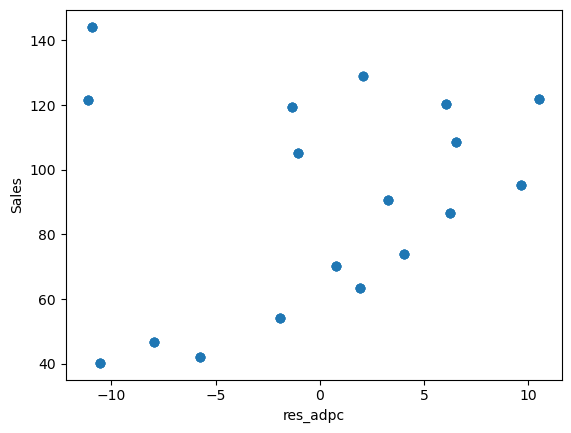

In [127]:
plt.scatter(res3,y_adpc)
plt.xlabel("res_adpc")
plt.ylabel("Sales")

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x_adpc,y_adpc,test_size=0.20,random_state=0)

In [126]:
x_train

,Advt,PC,sqr_pc
55,2.70,3.27,10.6929
69,10.37,8.04,64.6416
62,9.00,5.22,27.2484
43,8.33,4.89,23.9121
4,8.87,3.85,14.8225
65,10.18,7.50,56.2500
50,9.58,9.19,84.4561
2,4.59,3.30,10.8900
40,8.87,3.85,14.8225
11,10.18,7.50,56.2500


In [128]:
y_train

55     40.35
69    119.49
62     95.17
43     86.63
4      70.13
65    120.29
50    121.60
2      46.89
40     70.13
11    120.29
3      54.10
54     42.02
45     90.63
10    105.09
41     63.37
49    108.58
53    128.90
57     54.10
32    121.60
14    121.60
68    121.60
19     40.35
29    120.29
52    144.17
35    128.90
18     42.02
0      42.02
15    119.49
5      63.37
16    144.17
20     46.89
66    121.83
8      95.17
13    108.58
25     86.63
37     40.35
17    128.90
60     74.01
46    105.09
63     90.63
39     54.10
38     46.89
1      40.35
58     70.13
12    121.83
61     86.63
24     74.01
6      74.01
23     63.37
36     42.02
21     54.10
9      90.63
67    108.58
64    105.09
47    120.29
44     95.17
Name: Sales, dtype: float64

In [129]:
x_test

,Advt,PC,sqr_pc
26,9.00,5.22,27.2484
27,5.08,6.02,36.2404
48,11.03,7.11,50.5521
22,8.87,3.85,14.8225
30,11.03,7.11,50.5521
51,10.37,8.04,64.6416
7,8.33,4.89,23.9121
59,3.17,4.10,16.8100
34,17.33,9.85,97.0225
70,17.33,9.85,97.0225


In [130]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [131]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x_train1=sm.add_constant(x_train)
model=sm.OLS( y_train,x_train1).fit()
print(model.summary())
ols = linear_model.LinearRegression()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     919.5
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           5.12e-45
Time:                        23:26:22   Log-Likelihood:                -161.74
No. Observations:                  56   AIC:                             331.5
Df Residuals:                      52   BIC:                             339.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.2569      4.967     -6.696      0.0

In [132]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -33.2569428311908
Coefficients: 
 [ 1.67093265 27.21353089 -1.23623643]


In [134]:
y_pred = regr.predict(x_test)
fg = pd.DataFrame(y_pred)
fg

,0
0,90.150618
1,94.255148
2,116.167301
3,68.012209
4,116.167301
5,122.955116
6,84.175083
7,62.834256
8,143.810850
9,143.810850


In [135]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# 3.4 Model_3 Applying(Square Root)

In [ ]:
sales_3["squareRoot_pc"]=sales_3["PC"]**(1/2)
sales_3

In [ ]:
x_adpc=sales_3[["Advt","PC","squareRoot_pc"]]
y_adpc=sales_3["Sales"]
y_adpc

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_adpc,y_adpc,test_size=0.20,random_state=0)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [136]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x_train1=sm.add_constant(x_train)
model=sm.OLS( y_train,x_train1).fit()
print(model.summary())
ols = linear_model.LinearRegression()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     919.5
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           5.12e-45
Time:                        23:27:45   Log-Likelihood:                -161.74
No. Observations:                  56   AIC:                             331.5
Df Residuals:                      52   BIC:                             339.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.2569      4.967     -6.696      0.0

In [137]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -33.2569428311908
Coefficients: 
 [ 1.67093265 27.21353089 -1.23623643]


In [138]:
y_pred = regr.predict(x_test)
y_pred

array([ 90.15061758,  94.25514832, 116.16730136,  68.01220926,
       116.16730136, 122.95511636,  84.17508311,  62.83425596,
       143.81085033, 143.81085033,  50.75467528, 111.61675967,
       107.97393034,  70.6502161 , 122.95511636])

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# 3.5 Model_3 Applying(Log10)

In [139]:
sales_3['log_PC'] = np.log(sales_3['PC'])
(sales_3)

,Sales,Advt,PC,pre3,res3,zscore3,dummy,sqr_pc,log_PC
0,42.02,4.30,2.74,47.780667,-5.760667,-0.850929,1.0,7.5076,1.007958
1,40.35,2.70,3.27,50.895603,-10.545603,-1.557730,1.0,10.6929,1.184790
2,46.89,4.59,3.30,54.833886,-7.943886,-1.173420,1.0,10.8900,1.193922
3,54.10,4.54,3.41,56.016167,-1.916167,-0.283044,1.0,11.6281,1.226712
4,70.13,8.87,3.85,69.349755,0.780245,0.115253,1.0,14.8225,1.348073
...,...,...,...,...,...,...,...,...,...
66,121.83,11.03,7.11,111.305692,10.524308,1.554584,1.0,50.5521,1.961502
67,108.58,5.67,7.19,102.053608,6.526392,0.964037,1.0,51.6961,1.972691
68,121.60,9.58,9.19,132.703206,-11.103206,-1.640095,1.0,84.4561,2.218116
69,119.49,10.37,8.04,120.850659,-1.360659,-0.200988,1.0,64.6416,2.084429


In [140]:
x_ADPC =sales_3[["Advt","PC","log_PC"]]
y_ADPC = sales_3['Sales']
x_ADPC

,Advt,PC,log_PC
0,4.30,2.74,1.007958
1,2.70,3.27,1.184790
2,4.59,3.30,1.193922
3,4.54,3.41,1.226712
4,8.87,3.85,1.348073
...,...,...,...
66,11.03,7.11,1.961502
67,5.67,7.19,1.972691
68,9.58,9.19,2.218116
69,10.37,8.04,2.084429


In [141]:
x_train, x_test, y_train, y_test = train_test_split(x_ADPC,y_ADPC,test_size=0.20,random_state=0)

In [142]:
x_train

,Advt,PC,log_PC
55,2.70,3.27,1.184790
69,10.37,8.04,2.084429
62,9.00,5.22,1.652497
43,8.33,4.89,1.587192
4,8.87,3.85,1.348073
65,10.18,7.50,2.014903
50,9.58,9.19,2.218116
2,4.59,3.30,1.193922
40,8.87,3.85,1.348073
11,10.18,7.50,2.014903


In [143]:
y_train

55     40.35
69    119.49
62     95.17
43     86.63
4      70.13
65    120.29
50    121.60
2      46.89
40     70.13
11    120.29
3      54.10
54     42.02
45     90.63
10    105.09
41     63.37
49    108.58
53    128.90
57     54.10
32    121.60
14    121.60
68    121.60
19     40.35
29    120.29
52    144.17
35    128.90
18     42.02
0      42.02
15    119.49
5      63.37
16    144.17
20     46.89
66    121.83
8      95.17
13    108.58
25     86.63
37     40.35
17    128.90
60     74.01
46    105.09
63     90.63
39     54.10
38     46.89
1      40.35
58     70.13
12    121.83
61     86.63
24     74.01
6      74.01
23     63.37
36     42.02
21     54.10
9      90.63
67    108.58
64    105.09
47    120.29
44     95.17
Name: Sales, dtype: float64

In [144]:
x_test

,Advt,PC,log_PC
26,9.00,5.22,1.652497
27,5.08,6.02,1.795087
48,11.03,7.11,1.961502
22,8.87,3.85,1.348073
30,11.03,7.11,1.961502
51,10.37,8.04,2.084429
7,8.33,4.89,1.587192
59,3.17,4.10,1.410987
34,17.33,9.85,2.287471
70,17.33,9.85,2.287471


In [145]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [146]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x_train1=sm.add_constant(x_train)
model=sm.OLS( y_train,x_train1).fit()
print(model.summary())
ols = linear_model.LinearRegression()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     919.8
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           5.08e-45
Time:                        23:28:36   Log-Likelihood:                -161.73
No. Observations:                  56   AIC:                             331.5
Df Residuals:                      52   BIC:                             339.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.4580      6.353     -7.155      0.0

In [147]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -45.45801124014011
Coefficients: 
 [ 1.64612341 -2.22102619 80.54271655]


In [150]:
y_pred = regr.predict(x_test)
ghi = pd.DataFrame(y_pred)
ghi

,0
0,90.859973
1,94.114922
2,114.891953
3,69.169626
4,114.891953
5,121.640819
6,85.230158
7,64.298716
8,145.431364
9,145.431364


In [151]:
y_test

26     95.17
27     90.63
48    121.83
22     70.13
30    121.83
51    119.49
7      86.63
59     63.37
34    144.17
70    144.17
56     46.89
28    105.09
31    108.58
42     74.01
33    119.49
Name: Sales, dtype: float64

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
x_test
y_test